In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [6]:
def p_dt_int(x,flux):
    return np.exp(-flux*x)/np.sqrt(-np.log(x))

In [52]:
flux = np.linspace(0.00001,10,100)
hasattr(flux, '__iter__')

True

In [46]:
def p_dt(flux):
    if hasattr(flux,'__iter__'):
        return np.array([quad(p_dt_int,0,1,args=(f))[0] for f in flux])
    else:
        return quad(p_dt_int,0,1,args=(flux))[0]        

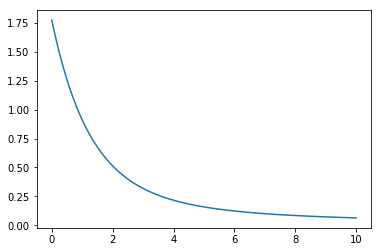

In [47]:
p = p_dt(flux)
plt.plot(flux,p)

In [38]:
quad(p_dt,0,20000)

(6.274084478888576, 2.4727366820798125e-08)

In [57]:
quad(p_dt,0,np.inf,limit=100)

(6.274084479067582, 8.342769556262663e-08)

In [39]:
# is that 2*pi?
print(2*np.pi)

6.283185307179586


In [50]:
def cdf_dt_int(x,flux):
    return np.exp(-flux*x)/np.sqrt(-np.log(x))/x

In [60]:
def cdf_dt(flux):
    if hasattr(flux,'__iter__'):
        return np.array([quad(cdf_dt_int,0,1,limit=200,args=(f))[0] for f in flux])
    else:
        return quad(cdf_dt_int,0,1,limit=200,args=(flux))[0]        

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


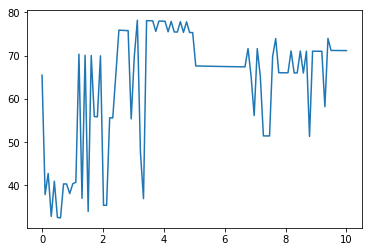

In [61]:
plt.plot(flux,cdf_dt(flux))